In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectPercentile, f_classif

# Train Test Split & CV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, GridSearchCV

# Model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve, matthews_corrcoef,plot_precision_recall_curve,precision_recall_curve,accuracy_score

# Joblib
import joblib 

# Others

In [2]:
df = pd.read_excel('Delivery truck trip data.xlsx')
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,2020-08-21 18:59:01.000,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",2020-08-28 14:38:04.447,12.663500,78.649870,NaN,R,CHEPUZTVSHUA1,HOSHOSALLCCA2,2020-08-17 14:59:01,NaT,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,2020-08-31 20:22:22.827,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:46:17.007,12.836757,79.954428,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-27 16:21:52,NaT,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,2020-08-31 21:59:24.987,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 16:03:30.793,13.073956,80.225780,G,NaN,CHEPONLUTCCA4,CHEPONLUTCCA4,2020-08-27 17:57:04,NaT,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,2020-09-01 04:48:24.503,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:50:27.997,12.836686,79.950560,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-28 00:47:45,NaT,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,2020-09-01 05:23:19.243,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 14:22:50.127,12.429501,79.831556,G,NaN,CHENETLUTCCA1,CHENETLUTCCA1,2020-08-28 01:13:48,NaT,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


Dataset Description:

- GpsProvider - Vendor who provides GPS
- BookingID - Unique Identification for a trip
- Market/Regular - Type of trip. 
    - Regular - Vendors with whom we will have contract.
    - Market - Vendor with whom we will not have contract
- BookingIDDate - Date when booking was created 
- vehicleno - Truck Number
- OriginLocation - Trip start place 
- DestinationLocation - Trip end place
- Orglatlon - Latitude/Longitude of start place
- Deslatlon - Latitude/Longitude of end place
- DataPingtime - Time when we receive GPS ping
- PlannedETA - Planned Estimated Time of Arrival 
- CurrentLocation - Live location
- DestinationLocation - Repeat of destination location
- actualeta - Time when the truck arrived 
- Currlat - current latitude - changes each time when we receive GPS ping
- Currlon - current longitude - changes each time when we receive GPS ping
- ontime 
    - If the truck arrived on time - calculated based on Planned and Actual ETA
- delay 
    - If the truck arrived with a delay - calculated based on Planned and Actual ETA 
- OriginLocationCode - Origin code
- DestinationLocationCode - Destination code 
- tripstartdate - Date/Time when trip started 
- tripenddate Date/Time when trip ended - based on documentation (cant be considered for calculating delay)\ 
- TRANSPORTATIONDISTANCEINKM - Total KM of travel
- vehicleType - Type of Truck
- Minimumkmstobecoveredinaday - Minimum KM the driver needs to cover in a day 
- DriverName - Driver details
- Driver_MobileNo - Driver details
- customerID - Customer details
- customerNameCode - Customer details
- supplierID - Supplier - Who provides the vehicle
- supplierNameCode - Supplier - Who provides the vehicle

I will try to drop few features that is not related :
1. Booking ID - Just Unique Code
1. Minimumkm - Just regulation from the supplier
1. DriverName - Name has nothing to do with the problem
1. Driver_MobileNo - More than 50% has nan value 
1. CustomerNameCode - Same with customerID
1. SupplierNameCode - Same with SupplierID
1. DestinationLocation - Same with Destination_Location
1. OriginCode - Same with Origin Location
1. DestinationCode - Same with Destination Location
1. CurrentLocation - Lets come back to it later
1. CurrLat & CurrLon - Lets come back later
1. Date pingtime - Same with currentloc

In [3]:
df.rename({
    'Market/Regular ':'Market/Regular',
    'TRANSPORTATION_DISTANCE_IN_KM':'Distance(Km)'
},axis=1,inplace=True)

In [4]:
# df.drop(['OriginLocation_Code','DestinationLocation_Code','Curr_lat','Curr_lon','Data_Ping_time','BookingID','Minimum_kms_to_be_covered_in_a_day','Driver_Name','Driver_MobileNo','customerNameCode','supplierNameCode','DestinationLocation'],axis=1,inplace=True)

In [5]:
df.drop(['OriginLocation_Code','DestinationLocation_Code','Current_Location','Curr_lat','Curr_lon','Data_Ping_time','BookingID','Minimum_kms_to_be_covered_in_a_day','Driver_Name','Driver_MobileNo','customerNameCode','supplierNameCode','DestinationLocation'],axis=1,inplace=True)

## Target Variable : Ontime or Delay

In [6]:
df.nunique()

GpsProvider               29
Market/Regular             2
BookingID_Date          6005
vehicle_no              2325
Origin_Location          180
Destination_Location     520
Org_lat_lon              173
Des_lat_lon              522
Planned_ETA             6294
actual_eta              6729
ontime                     1
delay                      1
trip_start_date         6107
trip_end_date           4722
Distance(Km)             564
vehicleType               44
customerID                39
supplierID               321
Material Shipped        1407
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   GpsProvider           5927 non-null   object        
 1   Market/Regular        6880 non-null   object        
 2   BookingID_Date        6880 non-null   datetime64[ns]
 3   vehicle_no            6880 non-null   object        
 4   Origin_Location       6880 non-null   object        
 5   Destination_Location  6880 non-null   object        
 6   Org_lat_lon           6880 non-null   object        
 7   Des_lat_lon           6880 non-null   object        
 8   Planned_ETA           6880 non-null   datetime64[ns]
 9   actual_eta            6843 non-null   datetime64[ns]
 10  ontime                2548 non-null   object        
 11  delay                 4342 non-null   object        
 12  trip_start_date       6880 non-null   datetime64[ns]
 13  trip_end_date     

In [8]:
feature = []
dtype = []
null = []
nullper = []
nunique = []
uniq_sample = []
for i in df.columns:    
    feature.append(i)
    dtype.append(df[i].dtype)
    null.append(df[i].isna().sum())
    nullper.append(df[i].isna().sum()/len(df))
    nunique.append(df[i].nunique())
    uniq_sample.append(df[i].unique()[0:2])
    
descr=pd.DataFrame({"Data Features": feature,
                   "Data Type": dtype,
                   "Null" : null,
                   "Null Percentage" : nullper,
                   "No. of Unique Values": nunique,
                   "Unique Sample": uniq_sample})
descr

,Data Features,Data Type,Null,Null Percentage,No. of Unique Values,Unique Sample
0,GpsProvider,object,953,0.138517,29,"[CONSENT TRACK, VAMOSYS]"
1,Market/Regular,object,0,0.000000,2,"[Market, Regular]"
2,BookingID_Date,datetime64[ns],0,0.000000,6005,"[2020-08-17T14:59:01.000000000, 2020-08-27T16:..."
3,vehicle_no,object,0,0.000000,2325,"[KA590408, TN30BC5917]"
4,Origin_Location,object,0,0.000000,180,"[TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU, DAIMLER..."
5,Destination_Location,object,0,0.000000,520,"[ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA,..."
6,Org_lat_lon,object,0,0.000000,173,"[13.1550,80.1960, 12.8390,79.9540]"
7,Des_lat_lon,object,0,0.000000,522,"[12.7400,77.8200, 12.8390,79.9540]"
8,Planned_ETA,datetime64[ns],0,0.000000,6294,"[2020-08-21T18:59:01.000000000, 2020-08-31T20:..."
9,actual_eta,datetime64[ns],37,0.005378,6729,"[2020-08-28T14:38:04.447000000, 2020-08-28T12:..."


### Check max and min date

In [9]:
print('Date max & min :')
print('')
print('BookingID_Date')
print(df['BookingID_Date'].max())
print(df['BookingID_Date'].min())
print('')
print('Planned_ETA')
print(df['Planned_ETA'].max())
print(df['Planned_ETA'].min())
print('')
print('actual_eta')
print(df['actual_eta'].max())
print(df['actual_eta'].min())
print('')
print('trip_start_date')
print(df['trip_start_date'].max())
print(df['trip_start_date'].min())
print('')
print('trip_end_date')
print(df['trip_end_date'].max())
print(df['trip_end_date'].min())

Date max & min :

BookingID_Date
2020-12-03 13:10:21
2019-03-18 12:19:22

Planned_ETA
2020-12-05 00:57:28
1899-12-30 04:06:00

actual_eta
2020-08-30 03:21:27.263000
1899-12-30 03:21:00

trip_start_date
2020-12-03 13:10:21
1899-12-30 00:00:00

trip_end_date
2020-08-28 12:15:10
1899-12-30 03:21:00


In [10]:
df.sort_values('Planned_ETA').head()

,GpsProvider,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,actual_eta,ontime,delay,trip_start_date,trip_end_date,Distance(Km),vehicleType,customerID,supplierID,Material Shipped
6868,JTECH,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",1899-12-30 04:06:00,1899-12-30 03:21:00,NaN,R,1899-12-30 00:00:00,1899-12-30 03:21:00,41.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,INSRT-VLV ST INTK
6264,NaN,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, Kolkata, West Bengal","Kalyani, Nadia, West Bengal","23.525267916088961,87.264424348570884","22.952176370977448,88.4571405591546",1899-12-30 08:58:00,1899-12-30 08:13:00,G,NaN,1899-12-30 00:00:00,1899-12-30 08:13:00,51.0,40 FT Flat Bed Multi-Axle 27MT - Trailer,LTLEXMUM40,55471,FXUWB-LID COVER
5910,NaN,Regular,2019-03-18 12:19:22,AP26TE1258,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",2019-03-19 11:45:22,2019-03-19 11:00:22,G,NaN,2019-03-18 12:19:22,2019-03-19 11:00:22,NaN,24 | 26 FT Taurus Open 21MT - HCV,LTLEXMUM40,55075,COOLANT HOSE / RADIATOR TO ENGINE
6632,NaN,Regular,2019-03-18 17:25:43,TN20CA 2365,"Kanchipuram, Tamil Nadu, India","Pondicherry, Puducherry, India","12.8341735,79.7036402","11.9415915,79.8083133",2019-03-19 15:47:43,2019-03-19 15:02:43,G,NaN,2019-03-18 17:25:43,2019-03-19 15:02:43,NaN,24 | 26 FT Taurus Open 21MT - HCV,LTLEXMUM40,999,A114 Alternator(New Versa)
5911,NaN,Regular,2019-03-18 17:03:13,TN32M5252,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",2019-03-19 16:54:13,2019-03-19 16:09:13,G,NaN,2019-03-18 17:03:13,2019-03-19 16:09:13,NaN,22 FT Taurus Open 16MT - HCV,LTLEXMUM40,999,LU CHARGE AIR HOSE / CAC OUTLET


Drop 2 outliers (row 6868 & 6264)

In [11]:
df.drop(df.index[[6868,6264]], inplace=True)

### Change Ontime/Delay to Target Variable Column
- ontime 
    - If the truck arrived on time - calculated based on Planned and Actual ETA
- delay 
    - If the truck arrived with a delay - calculated based on Planned and Actual ETA
    
Can be tracked using trip_end_date and planned ETA --> If trip_end_date > than planned ETA it means delay

- If both ontime and delay were nan, I am going to tracked it from the trip_end_date and planned ETA
- If onetime is 'G' and delay is 'R', I am going to also tracked it from the trip_end_date and planned ETA

In [12]:
df['ontime/delay']=np.where(df['ontime']=='G', 1, 0)

### Location
I want to create original & Destination City

In [13]:
def city(x):
    x=x.split(',')[1]
    return x

In [14]:
def state(x):
    x=x.split(',')[-1]
    return x

In [15]:
df['org_city']=df['Origin_Location'].apply(city)
df['org_state']=df['Origin_Location'].apply(state)
df['des_city']=df['Destination_Location'].apply(city)
df['des_state']=df['Destination_Location'].apply(state)
df

,GpsProvider,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,actual_eta,ontime,delay,trip_start_date,trip_end_date,Distance(Km),vehicleType,customerID,supplierID,Material Shipped,ontime/delay,org_city,org_state,des_city,des_state
0,CONSENT TRACK,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01.000,2020-08-28 14:38:04.447,NaN,R,2020-08-17 14:59:01,NaT,320.0,NaN,ALLEXCHE45,VIJEXHOSR7,BRACKET / GRAB HANDLE,0,CHENNAI,TAMIL NADU,HOSUR,KARNATAKA
1,VAMOSYS,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827,2020-08-28 12:46:17.007,G,NaN,2020-08-27 16:21:52,NaT,103.0,NaN,DMREXCHEUX,VJLEXSHE09,ZB MODEL PLATE / 3143,1,KANCHIPURAM,TAMIL NADU,KANCHIPURAM,TAMIL NADU
2,CONSENT TRACK,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987,2020-08-28 16:03:30.793,G,NaN,2020-08-27 17:57:04,NaT,300.0,NaN,LUTGCCHE06,GSTEXLAK1Q,LETTERING / FUSO,1,PONDY,PONDICHERRY,PONDY,PONDICHERRY
3,VAMOSYS,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503,2020-08-28 12:50:27.997,G,NaN,2020-08-28 00:47:45,NaT,61.0,NaN,DMREXCHEUX,ARVEXNAM09,LU STRUT RA / RADIUS ROD,1,KANCHIPURAM,TAMIL NADU,KANCHIPURAM,TAMIL NADU
4,VAMOSYS,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243,2020-08-28 14:22:50.127,G,NaN,2020-08-28 01:13:48,NaT,240.0,NaN,LUTGCCHE06,SRTEXKOR96,WISHBONE / V ROD/HDT,1,PONDY,PONDICHERRY,PONDY,PONDICHERRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,JTECH,Regular,2019-03-27 17:25:33.000,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-03-27 18:31:00.000,2019-03-27 17:46:00.000,G,NaN,2019-03-27 18:00:00,2019-03-27 17:46:00,12.0,25 FT Open Body 21MT,LTLEXMUM40,55556,TOOL KIT SET,1,Bangalore,Karnataka,Bangalore,Karnataka
6876,JTECH,Regular,2019-03-31 15:02:34.000,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-03-31 20:36:00.000,2019-03-31 19:51:00.000,G,NaN,2019-03-31 17:30:00,2019-03-31 19:51:00,31.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,CONTROL LEVER ASSY,1,Bangalore,Karnataka,Bangalore,Karnataka
6877,JTECH,Regular,2019-03-29 18:56:26.000,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-03-30 01:38:00.000,2019-03-30 00:53:00.000,G,NaN,2019-03-29 20:44:00,2019-03-30 00:53:00,49.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,SPARE PARTS AUTOMOBILE,1,Bangalore Rural,Karnataka,Bangalore,Karnataka
6878,JTECH,Regular,2019-03-27 08:29:45.000,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-03-27 17:20:00.000,2019-03-27 16:35:00.000,NaN,R,2019-03-27 15:29:00,2019-03-27 16:35:00,49.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,SPARE PARTS AUTOMOBILE,0,Bangalore Rural,Karnataka,Bangalore,Karnataka


In [16]:
def clean_text(x):
    x = x.replace(' ','')
    x = x.lower()
    x = x.capitalize()
    return x

In [17]:
df['org_city']=df['org_city'].apply(clean_text)
df['org_state']=df['org_state'].apply(clean_text)
df['des_city']=df['des_city'].apply(clean_text)
df['des_state']=df['des_state'].apply(clean_text)
df

,GpsProvider,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,actual_eta,ontime,delay,trip_start_date,trip_end_date,Distance(Km),vehicleType,customerID,supplierID,Material Shipped,ontime/delay,org_city,org_state,des_city,des_state
0,CONSENT TRACK,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01.000,2020-08-28 14:38:04.447,NaN,R,2020-08-17 14:59:01,NaT,320.0,NaN,ALLEXCHE45,VIJEXHOSR7,BRACKET / GRAB HANDLE,0,Chennai,Tamilnadu,Hosur,Karnataka
1,VAMOSYS,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827,2020-08-28 12:46:17.007,G,NaN,2020-08-27 16:21:52,NaT,103.0,NaN,DMREXCHEUX,VJLEXSHE09,ZB MODEL PLATE / 3143,1,Kanchipuram,Tamilnadu,Kanchipuram,Tamilnadu
2,CONSENT TRACK,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987,2020-08-28 16:03:30.793,G,NaN,2020-08-27 17:57:04,NaT,300.0,NaN,LUTGCCHE06,GSTEXLAK1Q,LETTERING / FUSO,1,Pondy,Pondicherry,Pondy,Pondicherry
3,VAMOSYS,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503,2020-08-28 12:50:27.997,G,NaN,2020-08-28 00:47:45,NaT,61.0,NaN,DMREXCHEUX,ARVEXNAM09,LU STRUT RA / RADIUS ROD,1,Kanchipuram,Tamilnadu,Kanchipuram,Tamilnadu
4,VAMOSYS,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243,2020-08-28 14:22:50.127,G,NaN,2020-08-28 01:13:48,NaT,240.0,NaN,LUTGCCHE06,SRTEXKOR96,WISHBONE / V ROD/HDT,1,Pondy,Pondicherry,Pondy,Pondicherry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,JTECH,Regular,2019-03-27 17:25:33.000,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-03-27 18:31:00.000,2019-03-27 17:46:00.000,G,NaN,2019-03-27 18:00:00,2019-03-27 17:46:00,12.0,25 FT Open Body 21MT,LTLEXMUM40,55556,TOOL KIT SET,1,Bangalore,Karnataka,Bangalore,Karnataka
6876,JTECH,Regular,2019-03-31 15:02:34.000,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-03-31 20:36:00.000,2019-03-31 19:51:00.000,G,NaN,2019-03-31 17:30:00,2019-03-31 19:51:00,31.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,CONTROL LEVER ASSY,1,Bangalore,Karnataka,Bangalore,Karnataka
6877,JTECH,Regular,2019-03-29 18:56:26.000,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-03-30 01:38:00.000,2019-03-30 00:53:00.000,G,NaN,2019-03-29 20:44:00,2019-03-30 00:53:00,49.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,SPARE PARTS AUTOMOBILE,1,Bangalorerural,Karnataka,Bangalore,Karnataka
6878,JTECH,Regular,2019-03-27 08:29:45.000,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-03-27 17:20:00.000,2019-03-27 16:35:00.000,NaN,R,2019-03-27 15:29:00,2019-03-27 16:35:00,49.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,SPARE PARTS AUTOMOBILE,0,Bangalorerural,Karnataka,Bangalore,Karnataka


In [18]:
from geopy import distance

#let's find the distance between origin and destination
distances_km = []
for x in df.itertuples(index=False):
   distances_km.append(
       distance.distance(x.Org_lat_lon, x.Des_lat_lon).km
   )

df['map_distance'] = distances_km

In [19]:
df.drop(['Origin_Location','Destination_Location','Org_lat_lon','Des_lat_lon','ontime','delay'],axis=1,inplace=True)

In [20]:
df.isna().sum()

GpsProvider         952
Market/Regular        0
BookingID_Date        0
vehicle_no            0
Planned_ETA           0
actual_eta           37
trip_start_date       0
trip_end_date       194
Distance(Km)        712
vehicleType         828
customerID            0
supplierID            0
Material Shipped      0
ontime/delay          0
org_city              0
org_state             0
des_city              0
des_state             0
map_distance          0
dtype: int64

In [21]:
df

,GpsProvider,Market/Regular,BookingID_Date,vehicle_no,Planned_ETA,actual_eta,trip_start_date,trip_end_date,Distance(Km),vehicleType,customerID,supplierID,Material Shipped,ontime/delay,org_city,org_state,des_city,des_state,map_distance
0,CONSENT TRACK,Market,2020-08-17 14:59:01.000,KA590408,2020-08-21 18:59:01.000,2020-08-28 14:38:04.447,2020-08-17 14:59:01,NaT,320.0,NaN,ALLEXCHE45,VIJEXHOSR7,BRACKET / GRAB HANDLE,0,Chennai,Tamilnadu,Hosur,Karnataka,261.868350
1,VAMOSYS,Regular,2020-08-27 16:22:22.827,TN30BC5917,2020-08-31 20:22:22.827,2020-08-28 12:46:17.007,2020-08-27 16:21:52,NaT,103.0,NaN,DMREXCHEUX,VJLEXSHE09,ZB MODEL PLATE / 3143,1,Kanchipuram,Tamilnadu,Kanchipuram,Tamilnadu,0.000000
2,CONSENT TRACK,Regular,2020-08-27 17:59:24.987,TN22AR2748,2020-08-31 21:59:24.987,2020-08-28 16:03:30.793,2020-08-27 17:57:04,NaT,300.0,NaN,LUTGCCHE06,GSTEXLAK1Q,LETTERING / FUSO,1,Pondy,Pondicherry,Pondy,Pondicherry,0.000000
3,VAMOSYS,Regular,2020-08-28 00:48:24.503,TN28AQ0781,2020-09-01 04:48:24.503,2020-08-28 12:50:27.997,2020-08-28 00:47:45,NaT,61.0,NaN,DMREXCHEUX,ARVEXNAM09,LU STRUT RA / RADIUS ROD,1,Kanchipuram,Tamilnadu,Kanchipuram,Tamilnadu,0.000000
4,VAMOSYS,Regular,2020-08-28 01:23:19.243,TN68F1722,2020-09-01 05:23:19.243,2020-08-28 14:22:50.127,2020-08-28 01:13:48,NaT,240.0,NaN,LUTGCCHE06,SRTEXKOR96,WISHBONE / V ROD/HDT,1,Pondy,Pondicherry,Pondy,Pondicherry,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,JTECH,Regular,2019-03-27 17:25:33.000,KA219502,2019-03-27 18:31:00.000,2019-03-27 17:46:00.000,2019-03-27 18:00:00,2019-03-27 17:46:00,12.0,25 FT Open Body 21MT,LTLEXMUM40,55556,TOOL KIT SET,1,Bangalore,Karnataka,Bangalore,Karnataka,10.551778
6876,JTECH,Regular,2019-03-31 15:02:34.000,KA01AE9163,2019-03-31 20:36:00.000,2019-03-31 19:51:00.000,2019-03-31 17:30:00,2019-03-31 19:51:00,31.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,CONTROL LEVER ASSY,1,Bangalore,Karnataka,Bangalore,Karnataka,21.403777
6877,JTECH,Regular,2019-03-29 18:56:26.000,KA01AE9163,2019-03-30 01:38:00.000,2019-03-30 00:53:00.000,2019-03-29 20:44:00,2019-03-30 00:53:00,49.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,SPARE PARTS AUTOMOBILE,1,Bangalorerural,Karnataka,Bangalore,Karnataka,541.202265
6878,JTECH,Regular,2019-03-27 08:29:45.000,KA21A3643,2019-03-27 17:20:00.000,2019-03-27 16:35:00.000,2019-03-27 15:29:00,2019-03-27 16:35:00,49.0,40 FT 3XL Trailer 35MT,LTLEXMUM40,55556,SPARE PARTS AUTOMOBILE,0,Bangalorerural,Karnataka,Bangalore,Karnataka,523.694406


### Time

In [22]:
from datetime import datetime, timedelta 

In [23]:
df['actual_eta'].fillna(df['trip_end_date'],inplace=True)

In [24]:
df['planned_sending_time']=df['Planned_ETA']-df['BookingID_Date']
df['actual_sending_time']=df['actual_eta']-df['BookingID_Date']
df['delayed_sending_time']=df['planned_sending_time']-df['actual_sending_time']
df['delayed_sending_time_hour'] = df['delayed_sending_time'] / np.timedelta64(1, 'h')
df.head()

,GpsProvider,Market/Regular,BookingID_Date,vehicle_no,Planned_ETA,actual_eta,trip_start_date,trip_end_date,Distance(Km),vehicleType,customerID,supplierID,Material Shipped,ontime/delay,org_city,org_state,des_city,des_state,map_distance,planned_sending_time,actual_sending_time,delayed_sending_time,delayed_sending_time_hour
0,CONSENT TRACK,Market,2020-08-17 14:59:01.000,KA590408,2020-08-21 18:59:01.000,2020-08-28 14:38:04.447,2020-08-17 14:59:01,NaT,320.0,NaN,ALLEXCHE45,VIJEXHOSR7,BRACKET / GRAB HANDLE,0,Chennai,Tamilnadu,Hosur,Karnataka,261.86835,4 days 04:00:00,10 days 23:39:03.447000,-7 days +04:20:56.553000,-163.650958
1,VAMOSYS,Regular,2020-08-27 16:22:22.827,TN30BC5917,2020-08-31 20:22:22.827,2020-08-28 12:46:17.007,2020-08-27 16:21:52,NaT,103.0,NaN,DMREXCHEUX,VJLEXSHE09,ZB MODEL PLATE / 3143,1,Kanchipuram,Tamilnadu,Kanchipuram,Tamilnadu,0.00000,4 days 04:00:00,0 days 20:23:54.180000,3 days 07:36:05.820000,79.601617
2,CONSENT TRACK,Regular,2020-08-27 17:59:24.987,TN22AR2748,2020-08-31 21:59:24.987,2020-08-28 16:03:30.793,2020-08-27 17:57:04,NaT,300.0,NaN,LUTGCCHE06,GSTEXLAK1Q,LETTERING / FUSO,1,Pondy,Pondicherry,Pondy,Pondicherry,0.00000,4 days 04:00:00,0 days 22:04:05.806000,3 days 05:55:54.194000,77.931721
3,VAMOSYS,Regular,2020-08-28 00:48:24.503,TN28AQ0781,2020-09-01 04:48:24.503,2020-08-28 12:50:27.997,2020-08-28 00:47:45,NaT,61.0,NaN,DMREXCHEUX,ARVEXNAM09,LU STRUT RA / RADIUS ROD,1,Kanchipuram,Tamilnadu,Kanchipuram,Tamilnadu,0.00000,4 days 04:00:00,0 days 12:02:03.494000,3 days 15:57:56.506000,87.965696
4,VAMOSYS,Regular,2020-08-28 01:23:19.243,TN68F1722,2020-09-01 05:23:19.243,2020-08-28 14:22:50.127,2020-08-28 01:13:48,NaT,240.0,NaN,LUTGCCHE06,SRTEXKOR96,WISHBONE / V ROD/HDT,1,Pondy,Pondicherry,Pondy,Pondicherry,0.00000,4 days 04:00:00,0 days 12:59:30.884000,3 days 15:00:29.116000,87.008088


In [25]:
df.drop(['BookingID_Date','Planned_ETA','actual_eta','trip_start_date','trip_end_date'],axis=1,inplace=True)

In [26]:
# df['Distance(Km)'].fillna(df['map_distance'],inplace=True)
df['Distance(Km)'].fillna(df['Distance(Km)'].mean(),inplace=True)

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


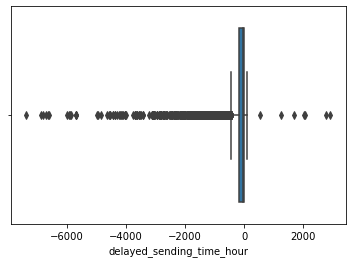

In [27]:
sns.boxplot(df['delayed_sending_time_hour'])

In [28]:
df.drop(['Material Shipped','Market/Regular','planned_sending_time','actual_sending_time','delayed_sending_time','delayed_sending_time_hour','map_distance'],axis=1,inplace=True)

In [29]:
# df['GpsProvider'].fillna(df['GpsProvider'].mode()[0], inplace=True)
# df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace=True)
df['GpsProvider'].fillna('Unknown', inplace=True)
df['vehicleType'].fillna('Unknown', inplace=True)

In [30]:
df.isna().sum()

GpsProvider     0
vehicle_no      0
Distance(Km)    0
vehicleType     0
customerID      0
supplierID      0
ontime/delay    0
org_city        0
org_state       0
des_city        0
des_state       0
dtype: int64

### Pipeline

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 6879
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GpsProvider   6878 non-null   object 
 1   vehicle_no    6878 non-null   object 
 2   Distance(Km)  6878 non-null   float64
 3   vehicleType   6878 non-null   object 
 4   customerID    6878 non-null   object 
 5   supplierID    6878 non-null   object 
 6   ontime/delay  6878 non-null   int32  
 7   org_city      6878 non-null   object 
 8   org_state     6878 non-null   object 
 9   des_city      6878 non-null   object 
 10  des_state     6878 non-null   object 
dtypes: float64(1), int32(1), object(9)
memory usage: 617.9+ KB


In [32]:
X = df.drop(['ontime/delay'],axis=1)
y = df['ontime/delay']

In [33]:
y.value_counts(normalize=True)

0    0.629689
1    0.370311
Name: ontime/delay, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=2021)

In [35]:
X_train.columns

Index(['GpsProvider', 'vehicle_no', 'Distance(Km)', 'vehicleType',
       'customerID', 'supplierID', 'org_city', 'org_state', 'des_city',
       'des_state'],
      dtype='object')

In [36]:

# imputer = SimpleImputer(strategy = 'most_frequent')
# encoder = ce.BinaryEncoder()

# imputed = imputer.fit_transform(df[['GpsProvider','vehicleType']])
# filled = pd.DataFrame(data = imputed, columns = ['GpsProvider','vehicleType'])
# encode = encoder.fit_transform(filled[['GpsProvider','vehicleType']])
# encoded = pd.DataFrame(data = encode.toarray())


In [37]:
# def gps_veh(col):
#     imputer = SimpleImputer(strategy = 'most_frequent')
#     encoder = ce.BinaryEncoder()
 
#     imputed = imputer.fit_transform(col)
#     filled = pd.DataFrame(data = imputed, columns = [['GpsProvider','vehicleType']])
#     encode = encoder.fit_transform(filled[['GpsProvider','vehicleType']])
# #     encoded = pd.DataFrame(data = encode.toarray())
 
#     return encode

In [38]:
transformer = ColumnTransformer([
#     ('gps_veh', FunctionTransformer(gps_veh, validate = False), ['GpsProvider','vehicleType']),
#     ('onehotpipe',OneHotEncoder(drop='first'),['Market/Regular']),
    ('ordinal',ce.OrdinalEncoder(),['vehicle_no','customerID','supplierID','org_city','org_state','des_city','des_state','GpsProvider','vehicleType']),
    ('robust', RobustScaler(), ['Distance(Km)'])
],remainder='passthrough')

In [39]:
dtc = DecisionTreeClassifier(random_state=2021)
logreg = LogisticRegression(random_state=2021)
nb = GaussianNB()
rf = RandomForestClassifier(random_state=2021)
gb = GradientBoostingClassifier(random_state=2021)
knn = KNeighborsClassifier()
smote=SMOTE(random_state=2021)

In [40]:
#1. Decision Tree
pipeline_dtc = Pipeline([
    ('transformer',transformer),
#     ('rfe', RFE(dtc)),
    ('resampling', smote),
    ('clf', dtc)
])

#2. Logistic Regression
pipeline_logreg = Pipeline([
    ('transformer',transformer),
#     ('rfe', RFE(logreg)),
    ('resampling', smote),
    ('clf', logreg)
])


#3. Gauss Naive Bayes
pipeline_nb = Pipeline([
    ('transformer',transformer),
#     ('selection',SelectPercentile(f_classif)),
    ('resampling',smote),
    ('clf',nb)
])

#4. RF
pipeline_rf = Pipeline([
    ('transformer',transformer),
#     ('selection',SelectPercentile(f_classif)),
    ('resampling',smote),
    ('clf',rf)
])

#5. GB
pipeline_gb = Pipeline([
    ('transformer',transformer),
#     ('selection',SelectPercentile(f_classif)),
    ('resampling',smote),
    ('clf',gb)
])

#6. KNN
pipeline_knn = Pipeline([
    ('transformer',transformer),
#     ('selection',SelectPercentile(f_classif)),
    ('resampling',smote),
    ('clf',knn)
])

In [41]:
# pipeline_nb.fit(X_train,y_train)

# X_train_prep = pipeline_nb.transform(X_train)
# # X_test_prep = pipeline_nb.transform(X_test)
# # X_test_head_prep = pipeline_nb.transform(X_test.head(3))
# # X_df_prep = pipeline_nb.transform(df)

# X_train_prep = pd.DataFrame(X_train_prep)
# # X_test_prep = pd.DataFrame(X_test_prep)
# # X_test_head_prep = pd.DataFrame(X_test_head_prep)
# # X_df_prep = pd.DataFrame(X_df_prep)

# X_train_prep

In [42]:
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2021)

dtc_score = cross_val_score(pipeline_dtc, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(pipeline_logreg, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1, verbose=1)
nb_score = cross_val_score(pipeline_nb, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1, verbose=1)
rf_score = cross_val_score(pipeline_rf, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1, verbose=1)
gb_score = cross_val_score(pipeline_gb, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1, verbose=1)
knn_score = cross_val_score(pipeline_knn, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]

In [43]:
print('DTC Val Score:', dtc_score)
print('Logreg Val Score:', logreg_score)
print('Naive Bayes Val Score:', nb_score)
print('RF Val Score:', rf_score)
print('GB Val Score:', gb_score)
print('KNN Val Score:', knn_score)

DTC Val Score: [0.84741144 0.84650318 0.85909091 0.87272727 0.85545455 0.87647593
 0.87011807 0.82818182 0.88545455 0.84181818 0.86557675 0.88101726
 0.86090909 0.86545455 0.87272727 0.8328792  0.85195277 0.86363636
 0.87454545 0.86090909 0.86830154 0.85286104 0.83818182 0.86181818
 0.87818182 0.86920981 0.86830154 0.85636364 0.87636364 0.88454545
 0.85195277 0.88192552 0.84       0.85727273 0.87909091 0.87284287
 0.84650318 0.85454545 0.87090909 0.85818182 0.86012716 0.85921889
 0.86818182 0.86636364 0.85545455 0.8537693  0.86012716 0.85272727
 0.85818182 0.83272727]
Logreg Val Score: [0.73841962 0.7102634  0.70181818 0.74363636 0.68272727 0.74023615
 0.64577657 0.58272727 0.73363636 0.76818182 0.71571299 0.62942779
 0.69545455 0.73636364 0.74272727 0.68119891 0.7729337  0.74909091
 0.71181818 0.72090909 0.66121708 0.74659401 0.78272727 0.71
 0.66818182 0.76385104 0.75658492 0.71909091 0.65       0.70636364
 0.72207084 0.73932788 0.73363636 0.73818182 0.71909091 0.70663034
 0.68119891

In [44]:
print('DTC Val Score:', dtc_score.mean())
print('Logreg Val Score:', logreg_score.mean())
print('Naive Bayes Val Score:', nb_score.mean())
print('RF Val Score:', rf_score.mean())
print('GB Val Score:', gb_score.mean())
print('KNN Val Score:', knn_score.mean())

DTC Val Score: 0.8609415077202545
Logreg Val Score: 0.7138492775163074
Naive Bayes Val Score: 0.6690139872842871
RF Val Score: 0.8923847411444141
GB Val Score: 0.8974924779126414
KNN Val Score: 0.7006711749649078


## RF

In [45]:
pipeline_rf.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal', OrdinalEncoder(),
                                    ['vehicle_no', 'customerID', 'supplierID',
                                     'org_city', 'org_state', 'des_city',
                                     'des_state', 'GpsProvider', 'vehicleType']),
                                   ('robust', RobustScaler(), ['Distance(Km)'])])),
  ('resampling', SMOTE(random_state=2021)),
  ('clf', RandomForestClassifier(random_state=2021))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal', OrdinalEncoder(),
                                  ['vehicle_no', 'customerID', 'supplierID',
                                   'org_city', 'org_state', 'des_city',
                                   'des_state', 'GpsProvider', 'vehicleType']),
                                 ('robust', RobustScaler(

In [46]:
hyperparam_space_rf = {"clf__max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=5)],
      }

skf = StratifiedKFold(n_splits=5)

gridsearch_rf = GridSearchCV(pipeline_rf, hyperparam_space_rf, scoring='accuracy', n_jobs=-1, cv=skf,verbose=1)
gridsearch_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['vehicle_no',
                                                                          'customerID',
                                                                          'supplierID',
                                                                          'org_city',
                                                                          'org_state',
                                                                          'des_city',
                                                                          'des_state'

In [47]:
gridsearch_rf.best_params_

{'clf__max_depth': 8}

In [48]:
report_grid = pd.DataFrame(gridsearch_rf.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.000898,0.043925,0.057821,0.002637,8,{'clf__max_depth': 8},0.896458,0.911898,0.896364,0.890000,0.899091,0.898762,0.007218,1
2,1.122933,0.032193,0.061749,0.003127,15,{'clf__max_depth': 15},0.896458,0.906449,0.898182,0.876364,0.895455,0.894581,0.009899,2


In [49]:
gridsearch_rf.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['vehicle_no', 'customerID',
                                                   'supplierID', 'org_city',
                                                   'org_state', 'des_city',
                                                   'des_state', 'GpsProvider',
                                                   'vehicleType']),
                                                 ('robust', RobustScaler(),
                                                  ['Distance(Km)'])])),
                ('resampling', SMOTE(random_state=2021)),
                ('clf',
                 RandomForestClassifier(max_depth=8, random_state=2021))])

In [50]:
rf_tuned = gridsearch_rf.best_estimator_.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       866
           1       0.90      0.78      0.84       510

    accuracy                           0.89      1376
   macro avg       0.89      0.87      0.88      1376
weighted avg       0.89      0.89      0.89      1376



## GB

In [51]:
# pipeline_gb.get_params()

In [52]:
# hyperparam_space_gb = {"clf__learning_rate":[int(x) for x in np.linspace(start=0.1, stop=1, num=5)],
#       "clf__n_estimators":[int(x) for x in np.linspace(start=100, stop=10000, num=5)]}

# skf = StratifiedKFold(n_splits=5)

# gridsearch_gb = GridSearchCV(pipeline_gb, hyperparam_space_gb, scoring='accuracy', n_jobs=-1, cv=skf,verbose=1)
# gridsearch_gb.fit(X_train, y_train)

In [53]:
# gridsearch_gb.best_params_

In [54]:
# report_grid2 = pd.DataFrame(gridsearch_gb.cv_results_).sort_values('rank_test_score', ascending=True)
# report_grid2.head(2)

In [55]:
# gridsearch_gb.best_estimator_

In [56]:
# gb_tuned = gridsearch_gb.best_estimator_.fit(X_train, y_train)
# y_pred_gb_tuned =gb_tuned.predict(X_test)
# print(classification_report(y_test, y_pred_gb_tuned))

## Result

In [57]:
hasil = pd.DataFrame({
    'Logistic Regression':[logreg_score.mean(),'-'],
    'Decision Tree Classifier':[dtc_score.mean(),'-'],
    'Gaussian Naive Bayes':[nb_score.mean(),'-'],
    'K Nearest Neighbors':[knn_score.mean(),'-'],
    'Ranfom Forest Classifier':[rf_score.mean(),accuracy_score(y_test,y_pred_rf_tuned)],
#     'Gradient Boosting Classifier':[gb_score.mean(),accuracy_score(y_test,y_pred_gb_tuned)]
    'Gradient Boosting Classifier':[gb_score.mean(),'-']
},index=['Benchmark','Tuned'])
hasil

,Logistic Regression,Decision Tree Classifier,Gaussian Naive Bayes,K Nearest Neighbors,Ranfom Forest Classifier,Gradient Boosting Classifier
Benchmark,0.713849,0.860942,0.669014,0.700671,0.892385,0.897492
Tuned,-,-,-,-,0.888808,-


In [58]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [59]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed.columns = ['vehicle_no','customerID','supplierID','org_city','org_state','des_city','des_state','GpsProvider','vehicleType','Distance(Km)']
X_train_preprocessed

,vehicle_no,customerID,supplierID,org_city,org_state,des_city,des_state,GpsProvider,vehicleType,Distance(Km)
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.052192
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.561094
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.761468
3,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,3.079307
4,5.0,5.0,5.0,2.0,2.0,5.0,3.0,2.0,5.0,-0.053823
...,...,...,...,...,...,...,...,...,...,...
5497,720.0,5.0,24.0,21.0,16.0,25.0,13.0,2.0,5.0,-0.234862
5498,495.0,5.0,67.0,36.0,18.0,56.0,19.0,2.0,5.0,-0.301733
5499,154.0,5.0,67.0,36.0,18.0,56.0,19.0,2.0,5.0,-0.301733
5500,225.0,5.0,57.0,30.0,17.0,49.0,16.0,2.0,5.0,-0.287054


# RF V1

In [60]:
rf.fit(X_train_preprocessed,y_train)

RandomForestClassifier(random_state=2021)

In [61]:
y_pred_rf = rf.predict(X_test_preprocessed)
print('Accuracy', accuracy_score(y_test, y_pred_rf))

Accuracy 0.8873546511627907


In [62]:
haha = ['vehicle_no','customerID','supplierID','org_city','org_state','des_city','des_state','GpsProvider','vehicleType','Distance(Km)']
haha

['vehicle_no',
 'customerID',
 'supplierID',
 'org_city',
 'org_state',
 'des_city',
 'des_state',
 'GpsProvider',
 'vehicleType',
 'Distance(Km)']

In [63]:
importance_table = pd.DataFrame({
    'importance': rf.feature_importances_
}, index=haha)
importance_table = importance_table.sort_values('importance',ascending=False)
importance_table

,importance
GpsProvider,0.367738
vehicleType,0.156198
vehicle_no,0.117669
Distance(Km),0.106179
org_state,0.049333
supplierID,0.048365
org_city,0.044596
des_city,0.038797
customerID,0.038588
des_state,0.032536


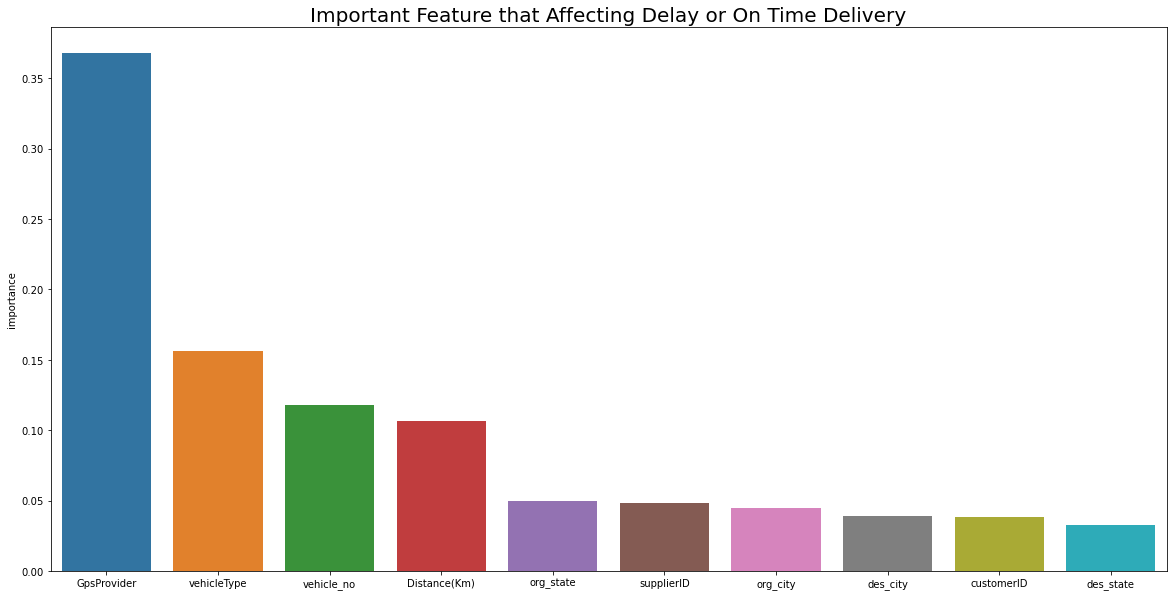

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x=importance_table.index,y='importance',data=importance_table)
plt.title('Important Feature that Affecting Delay or On Time Delivery',fontsize=20)
plt.show()

# GB V2

In [65]:
gb.fit(X_train_preprocessed,y_train)

GradientBoostingClassifier(random_state=2021)

In [66]:
y_pred_gb = gb.predict(X_test_preprocessed)
print('Accuracy', accuracy_score(y_test, y_pred_gb))

Accuracy 0.8924418604651163


In [67]:
importance_tablegb = pd.DataFrame({
    'importance': gb.feature_importances_
}, index=haha)
importance_tablegb = importance_tablegb.sort_values('importance',ascending=False)

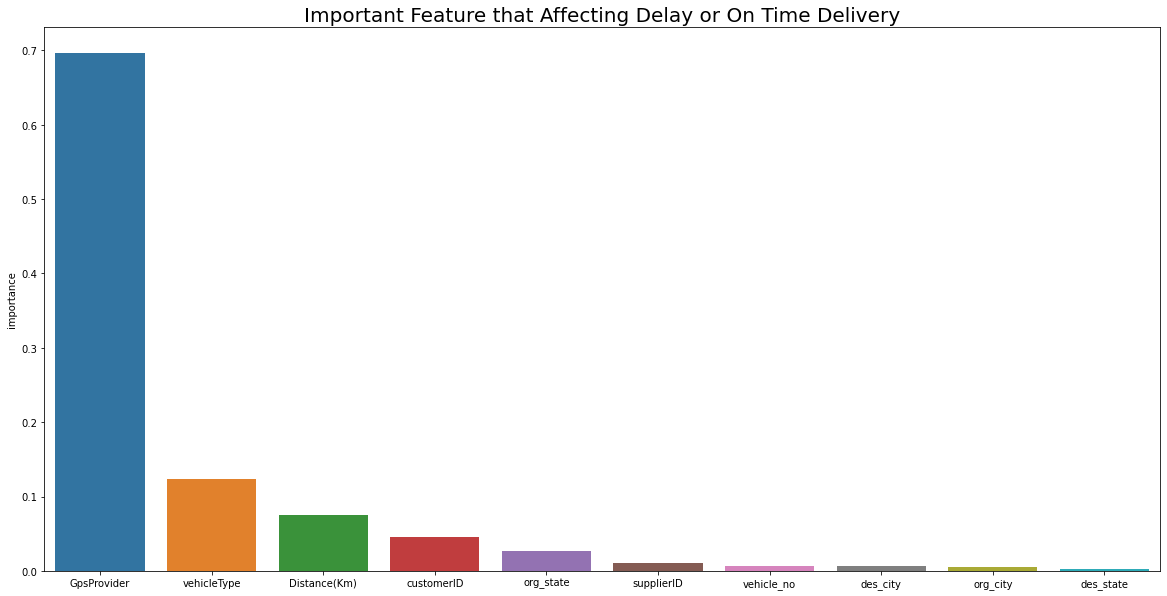

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(x=importance_tablegb.index,y='importance',data=importance_tablegb)
plt.title('Important Feature that Affecting Delay or On Time Delivery',fontsize=20)
plt.show()